In [18]:
import pandas

In [19]:
data = pandas.read_csv("time_series_covid19_deaths_US.csv") # Also has a read_json, read_excel, read_clipboard, read_pickle, and more!

In [20]:
data # Printing out our dataframe.

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,31,31,31,31,31,31,31,31,31,31
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,69,69,69,69,71,71,71,71,74,77
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,9,9,9,9,9,9,9,9,9,9
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,14,15,15,15,15,15,15,15,15,15
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,25,25,25,25,25,25,25,25,25,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,1,1,1,1,1,1,1,1,2,2
3336,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,3,3,3,3,3,3,3,3,3,3
3337,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,0,0,0,10,10,10,10,10,0,0
3338,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,7,7,7,7,7,7,7,7,7,7


In [21]:
data = data[data.Province_State == "Florida"] # Filter on state
data = data[data.Admin2 == 'Miami-Dade'] # Filter on county
data

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20
382,84012086,US,USA,840,12086.0,Miami-Dade,Florida,US,25.611236,-80.551706,...,3615,3624,3625,3634,3643,3647,3662,3669,3675,3670


In [22]:
data = data.transpose()
data

,382
UID,84012086
iso2,US
iso3,USA
code3,840
FIPS,12086
...,...
10/31/20,3647
11/1/20,3662
11/2/20,3669
11/3/20,3675


In [23]:
REMOVE_KEYS = ["UID","iso2","iso3","code3","FIPS","Admin2","Province_State","Country_Region","Lat","Long_","Combined_Key","Population"]

for key in REMOVE_KEYS:
    try:
        data = data.drop(key)
    except:
        print (key + " not in .csv")
data

,382
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0
...,...
10/31/20,3647
11/1/20,3662
11/2/20,3669
11/3/20,3675


In [24]:
data

,382
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0
...,...
10/31/20,3647
11/1/20,3662
11/2/20,3669
11/3/20,3675


In [25]:
data.columns = ['perDay']
data

,perDay
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0
...,...
10/31/20,3647
11/1/20,3662
11/2/20,3669
11/3/20,3675


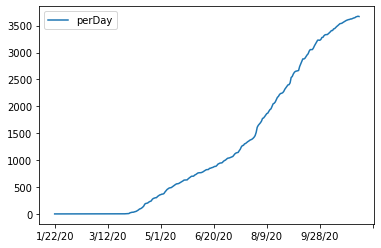

In [26]:
data.plot()

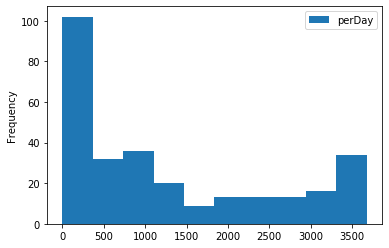

In [27]:
data.plot.hist()

In [28]:
data.mean() # Average of data

perDay    1248.861111
dtype: float64

In [29]:
data.mode() # Mode of data.  Lots of early data reported from back in January.

,perDay
0,0


In [30]:
data.median() # Median of data.

perDay    823.5
dtype: float64

In [31]:
data.std() # Sample standard deviation of the data.

perDay    1258.72163
dtype: float64